# Расчёт надёжности методом свёртки

Блок-схема надежности ХТС представлена на рисунке.

![Не забудьте скачать картинки!](svertka_bsn.png)

Элементы ХТС могут считаться равнонадежными. Распределение наработки - нормальное.
Средняя наработка элемента до отказа – 3000 часов, стандартное отклонение наработки до отказа
– 500 часов

**Требуется:**

- Построить графики показателей надежности элемента и системы: вероятности отказа, вероятности безотказной работы, плотности распределения отказов, интенсивности отказов

- Рассчитать среднюю наработку до отказа системы

- Записать логическую функцию работоспособности и логическую функцию отказов

- Построить параметрический граф надежности

## Подготовка к решению

In [18]:
# Подключение библиотек

# Стандартные функции для вычислений и графики:
import numpy as np # работа с массивами
import matplotlib.pyplot as plt # графики

# Расчеты надежности:
from scipy.stats import norm # Работа с нормальным распределением
from scipy.misc import derivative # Вычисление производной
from scipy.integrate import quad # Вычисление определенного интеграла

# Настройка формата графиков
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

Функции для работы с нормальным распределением описаны в документации на пакет [`scipy.stats`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm)
- Функция распределения (Cumulative Distribution Function) - `norm.cdf()`

- Плотность распределения (Probability Density function) - `norm.pdf()`

## Решение

Зададим параметры наработки до отказа элемента. Распределение - нормальное с параметрами:

In [1]:
T = 3000 # Средняя наработка до отказа одного элемента
s = 500 # Стандартное отклонение наработки до отказа элемента

Зададим функции для показателей надежности элемента:

In [21]:
# Вероятность отказа элемента (функция распределения наработки до отказа)
Q = lambda t: norm.cdf(t, T, s)

# Вероятность безотказной работы элемента:
P = lambda t: 1 - Q(t)

# Плотность распределения отказов:
f = lambda t: norm.pdf(t, T, s)

# Интенсивность отказов:
Lambda = lambda t: f(t) / P(t)

Построим графики показателей надежности элемента

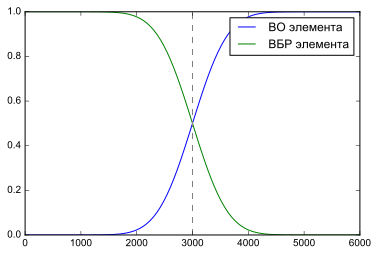

In [28]:
# ВБР и вероятность отказа
t = np.linspace(0.1, 2 * T, 100)

plt.plot(t, Q(t), label = 'ВО элемента')
plt.plot(t, P(t), label = 'ВБР элемента')
plt.axvline(x = T, linestyle = 'dashed', color = 'grey')

plt.legend();

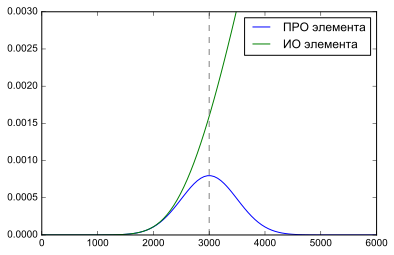

In [33]:
# ПРО и интенсивность отказов элемента
plt.plot(t, f(t), label = 'ПРО элемента')
plt.plot(t, Lambda(t), label = 'ИО элемента')
plt.axvline(x = T, linestyle = 'dashed', color = 'grey')
plt.ylim((0, 0.003))

plt.legend();


Метод свертки предполагает расчет однородных блоков (только параллельное или последовательное соединение) с последующим укрупнением, "сворачиванием" блоков. На рисунке показана последовательность расчета блоков системы в данной задаче.

![Не забудьте загрузить файлы с рисунками](svertka_blocks.png)

In [35]:
# Блок A - параллельное соединение двух элементов
Q_A = lambda t: Q(t)**2

# Блок B - последовательное соединение блока A и элемента 3
P_B = lambda t: (1 - Q_A(t)) * P(t)

# Блок C - последовательное соединение двух элементов 4 и 5
P_C = lambda t: P(t)**2

# Блок D - параллельное соединение блоков B и C
Q_D = lambda t: (1 - P_B(t)) * (1 - P_C(t))
    
# Система - последовательное соединение блока D и элемента 6
P_S = lambda t: (1 - Q_D(t)) * P(t)

Показатели надежности связаны между собой следующими отношениями

Вероятность отказа: $$Q(t) = 1 - P(t)$$

Плотность распределения отказов:

$$ f(t) = \frac{dQ(t)}{dt} $$

Интенсивность отказов:
$$ \lambda(t) = \frac{f(t)}{P(t)} $$


In [52]:
# Вероятность отказа системы
Q_S = lambda t: 1 - P_S(t)

# ПРО системы
f_S = lambda t: derivative(Q_S, t, dx = 0.1)

# Интенсивность отказов системы
Lambda_S = lambda t: f_S(t) / P_S(t)

Сравнение показателей надежности элемента и системы

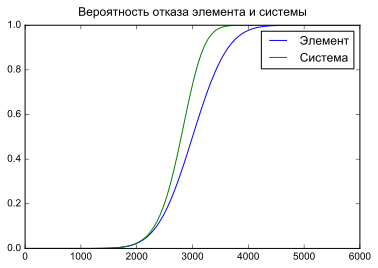

In [53]:
# Вероятность отказа

plt.plot(t,Q(t), label = "Элемент")
plt.plot(t,Q_S(t), label = "Система")
plt.title('Вероятность отказа элемента и системы', y = 1.02)
plt.legend();

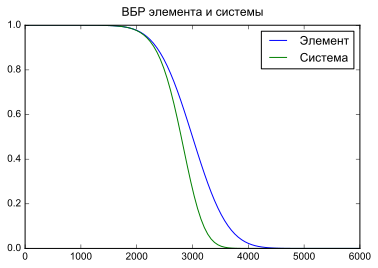

In [54]:
# ВБР

plt.plot(t,P(t), label = "Элемент")
plt.plot(t,P_S(t), label = "Система")
plt.title('ВБР элемента и системы', y = 1.02)
plt.legend();

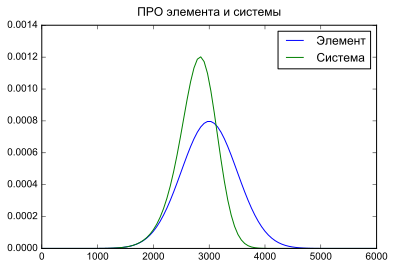

In [55]:
# ПРО

plt.plot(t,f(t), label = "Элемент")
plt.plot(t,f_S(t), label = "Система")
plt.title('ПРО элемента и системы', y = 1.02)
plt.legend();

c:\winpython32\python-3.4.3\lib\site-packages\ipykernel\__main__.py:8: RuntimeWarning: invalid value encountered in true_divide


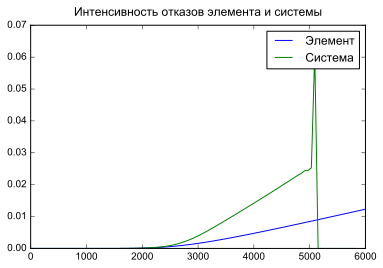

In [56]:
# Интенсивность отказов
plt.plot(t,Lambda(t), label = "Элемент")
plt.plot(t,Lambda_S(t), label = "Система")
plt.title('Интенсивность отказов элемента и системы', y = 1.02)
plt.legend();

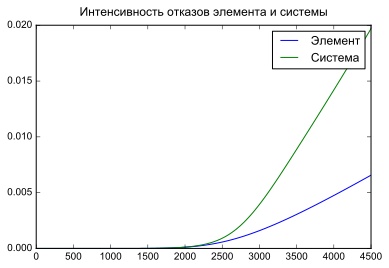

In [65]:
# Починка ошибки деления
t = np.linspace(0.1, 4500, 101)

# Графики
plt.plot(t,Lambda(t), label = "Элемент")
plt.plot(t,Lambda_S(t), label = "Система")
    
plt.title('Интенсивность отказов элемента и системы', y = 1.02)
plt.legend();


Средняя наработка до отказа системы: $$ T = \int\limits_0^\infty P(t) \,\mathrm{d}t $$


В Python можно вычислить только определенный интеграл, поэтому необходимо выбрать достаточно большой интервал, на правой границе которого $P(t) \approx 0$


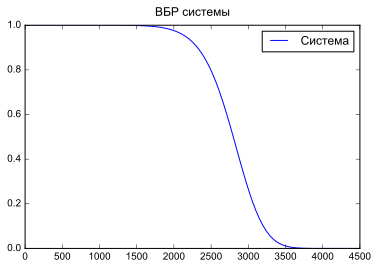

In [66]:
plt.plot(t,P_S(t), label = "Система")
plt.title('ВБР системы', y = 1.02)
plt.legend();

In [70]:
(T_S, err) = quad(P_S, 0, 5000)

print("Средняя наработка до отказа системы: %d часов (элемента - %d часов)" % (T_S, T))

Средняя наработка до отказа системы: 2774 часов (элемента - 3000 часов)
